<a href="https://colab.research.google.com/github/PriyankaSejwal/Bike-Sharing-Demand-Prediction/blob/main/PriyankaRimo_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np

# importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# importing warnings
import warnings
warnings.filterwarnings('ignore')

# importing train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# importing the algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# importing the evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
# mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading the dataset

bike = pd.read_csv('/content/drive/MyDrive/data file alma better/Capstone Project Regression/SeoulBikeData.csv', encoding = 'unicode_escape')

## <b>First look

In [4]:
# reading the data
# first five observations
bike.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# last 5 observations
bike.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


We can observe from the Date column that we have the data from december 2017 to november 2018 i.e. data of an year.

In [5]:
# checking the shape of the dataset

bike.shape

(8760, 14)

In [6]:
bike.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

* We do not have any null-values in the dataset which is very good as these can be a problem to many machine learning algorithms.
* There are six features of float datatype, four feature of integral datatype and four are of object datatype.
* Feature Date can be seen as object, we can convert it to datetime and work on it if required. 

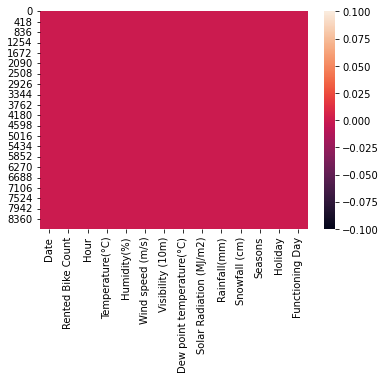

In [8]:
sns.heatmap(bike.isnull())

It is clear that our data doesnot have any missing value in any column. 

In [9]:
# summary statistics for numerical features
bike.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


## OBSERVATIONS
* Dependent Variable *Rented Bike Count* has mean ~ 704 and median ~ 504. Mean is higher than the median the feature is positively skewed. 
* Similarly features - *Visibility, Solar Radiation, Rainfall, Snowfall* have difference in mean and median, we can say these are skewed features.
* Feature - *Hour* on the other hand has similar values for mean and median so it follows a normal distribution.
* Feature *Temperature, Humidity, Windspeed,* also follow somewhat normal distribution.

In [10]:
# summary statistics for object type features

bike.describe(include='object').T

,count,unique,top,freq
Date,8760,365,01/12/2017,24
Seasons,8760,4,Spring,2208
Holiday,8760,2,No Holiday,8328
Functioning Day,8760,2,Yes,8465


## OBSERVATIONS

* Feature *Seasons* has four unique categories and frequently occuring is Spring with frequency 2208.
* Feature *Holiday* has two unique categories - Holiday and No Holiday. No holiday occurs 8328 times out of total 8760 obbservations.
* Feature *Functioning Day* has two unique categories - Yes and No with Yes occuring in 8465 observations times out of total 8760 observations.
* We will encode these three features- *Seasons, Holiday* and *Functioning Day* for better readability and making it suitable to fit to regression algorithm.
* Date can be used as a date time columns to retrive information out of it.

In [11]:
bike[bike.duplicated()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


There are no duplicate observations in the dataset.

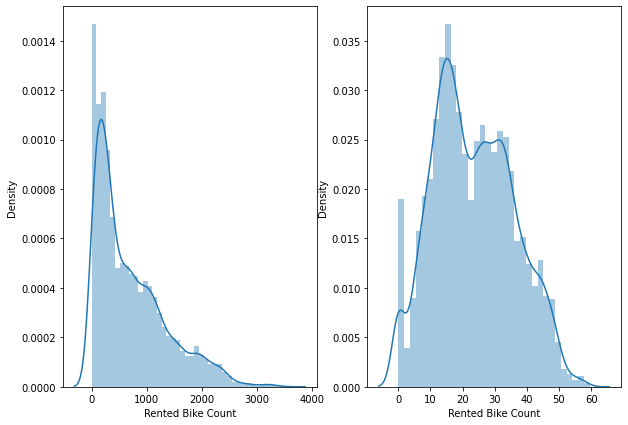

In [12]:
# distribution plot for the depedent variable 
fig,ax = plt.subplots(1,2, figsize=(10,7))
sns.distplot(bike['Rented Bike Count'], ax=ax[0])
sns.distplot(np.sqrt(bike['Rented Bike Count']), ax=ax[1])

The distribution of dependent variable was rightly skewed so we used square root method to see the changes in the distribution plot.

In [13]:
# Creating a copy of the dataset and adding some additional features using existing feature - Date.
df = bike.copy()

In [14]:
# Splitting the Date column into date month and year separately
import datetime
#df['Date']= df['Date'].apply(lambda x: datetime.datetime.strptime(x,"%d/%m/%Y"))
df['Day'] = pd.DatetimeIndex(bike['Date'], dayfirst=True).day_name()
df['month'] = pd.DatetimeIndex(bike['Date'], dayfirst=True).month_name()
df['year'] = pd.DatetimeIndex(bike['Date'], dayfirst=True).year

In [15]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,month,year
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017


* Here we have converted the Date column into three columns namely: day, month and year in order to extract some information out of the Date column.
* Now we can get rid of the initial Date column which had many unique values and was of no use. 
* The observations are from december 2017 to november 2018. So we see only two unique values in the year feature.

In [16]:
# We will now use the Day column to extract whether day is a weekday or a weekend as there can be a difference to observe in the count Bikes getting rented on weekends and weekdays
df['is_weekend']= df['Day'].apply(lambda x: 1 if x in ['Sunday', 'Saturday'] else 0).astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Date                       8760 non-null   object  
 1   Rented Bike Count          8760 non-null   int64   
 2   Hour                       8760 non-null   int64   
 3   Temperature(°C)            8760 non-null   float64 
 4   Humidity(%)                8760 non-null   int64   
 5   Wind speed (m/s)           8760 non-null   float64 
 6   Visibility (10m)           8760 non-null   int64   
 7   Dew point temperature(°C)  8760 non-null   float64 
 8   Solar Radiation (MJ/m2)    8760 non-null   float64 
 9   Rainfall(mm)               8760 non-null   float64 
 10  Snowfall (cm)              8760 non-null   float64 
 11  Seasons                    8760 non-null   object  
 12  Holiday                    8760 non-null   object  
 13  Functioning Day            8760 n

In [18]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,month,year,is_weekend
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,0


In [19]:
# Dropping the initial Date columns

df.drop('Date', axis=1, inplace=True)

## <b>Visualizing Categorical Data

In [20]:
# separatin gout the categorical variables
cat_col = [col for col in df.columns if df[col].dtype.name in ['object', 'category']]
print(cat_col)

['Seasons', 'Holiday', 'Functioning Day', 'Day', 'month', 'is_weekend']


### <b>Univariate analysis

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64


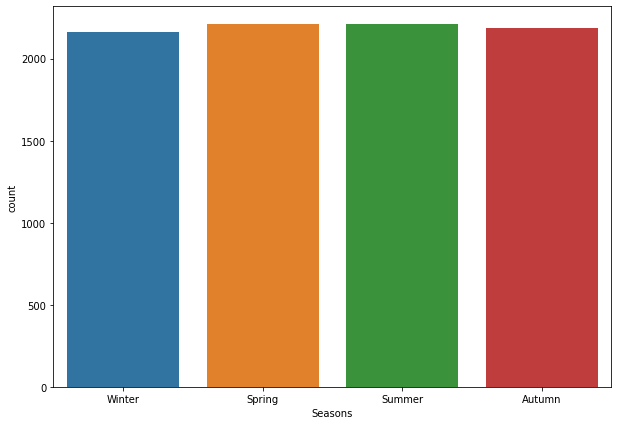

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64


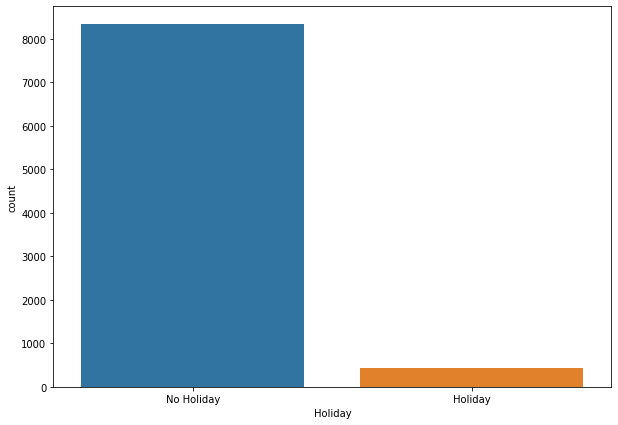

Yes    8465
No      295
Name: Functioning Day, dtype: int64


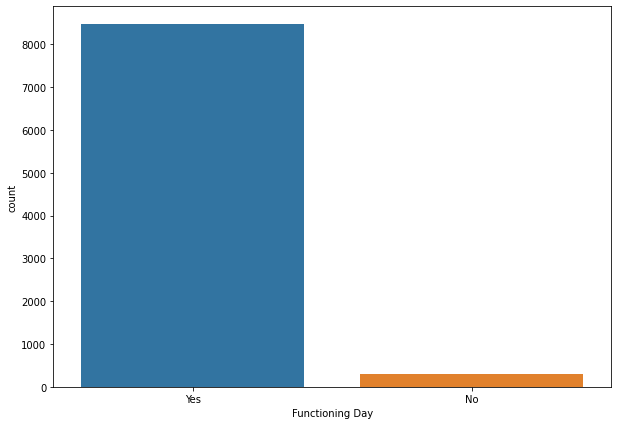

Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: Day, dtype: int64


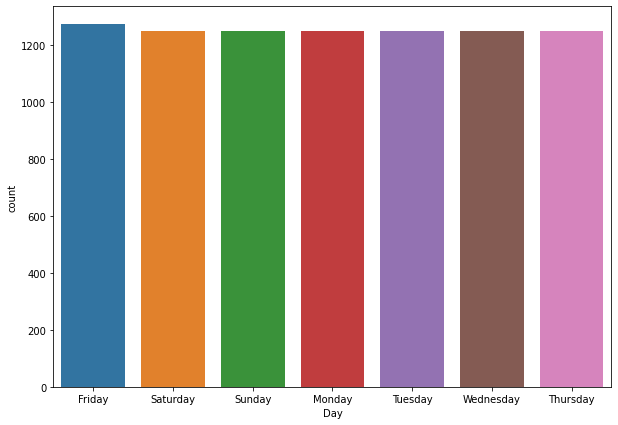

December     744
January      744
March        744
May          744
July         744
August       744
October      744
April        720
June         720
September    720
November     720
February     672
Name: month, dtype: int64


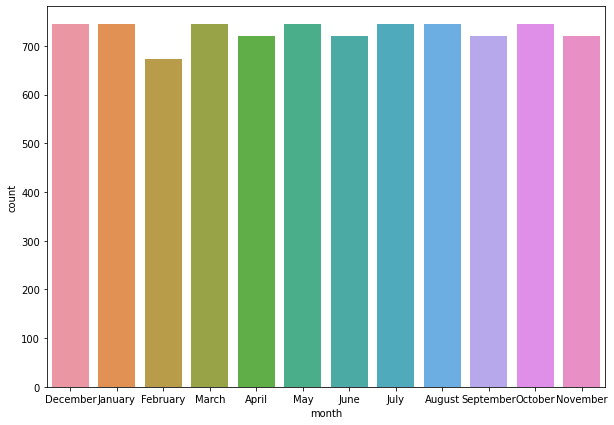

0    6264
1    2496
Name: is_weekend, dtype: int64


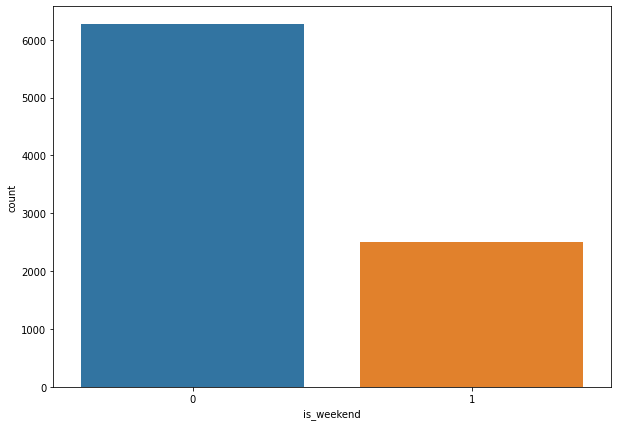

In [21]:
# Univariate analysis of the categorical features to see the frequency of unique values in the features
for col in cat_col: 
  plt.figure(figsize=(10,7))
  sns.countplot(df[col])
  print(df[col].value_counts())
  plt.show()

### <b>Bivariate Analysis - Rented Bike Counts v/s Categorical Columns<b>

Text(0.5, 1.0, 'effect of Seasons on rented bike count')

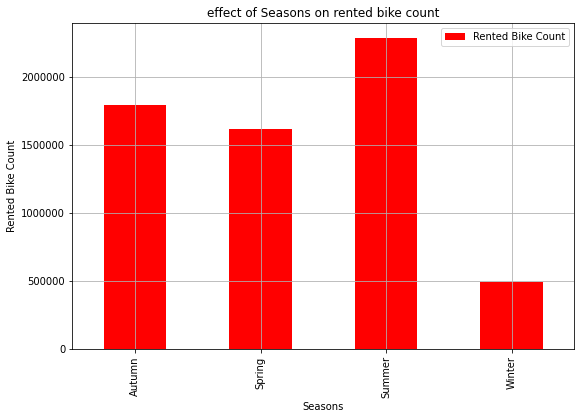

In [22]:
# Rented bike count v/s Seasons
plt.figure(figsize=(9,6))
df.groupby('Seasons')['Rented Bike Count'].sum().plot.bar(color='red', grid=True, legend=True)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')
plt.title('effect of Seasons on rented bike count')

#### <b> OBSERVATION:
* People are more likely to rent a bike in Summer.
* Least likely is renting a car in summer season.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

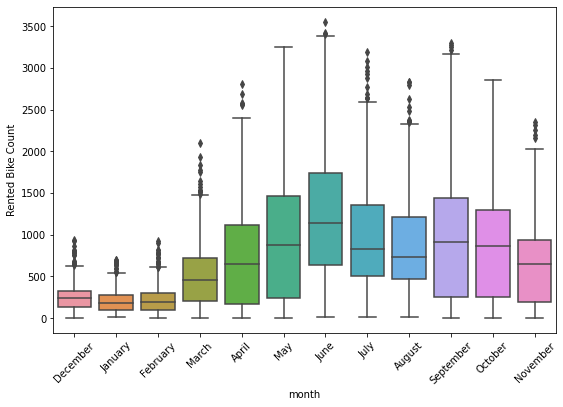

In [23]:
# Demand of bikes in different months
plt.figure(figsize=(9,6))
sns.boxplot(x=df['month'], y=df['Rented Bike Count'])
plt.xticks(rotation=45)

#### <b> Observations:
* December, January, February months have a quite lesser demand.
* June has the highest demand.
* May, June has the highest average demand followed by September, October.
* December, January, February are the cold months as demand is lowest in these months and Winter season.
* We can say that summer season fall around in may, june as summers had a highest demand.
* September, October might be the fall/ autumn months as they see the second highets demand.

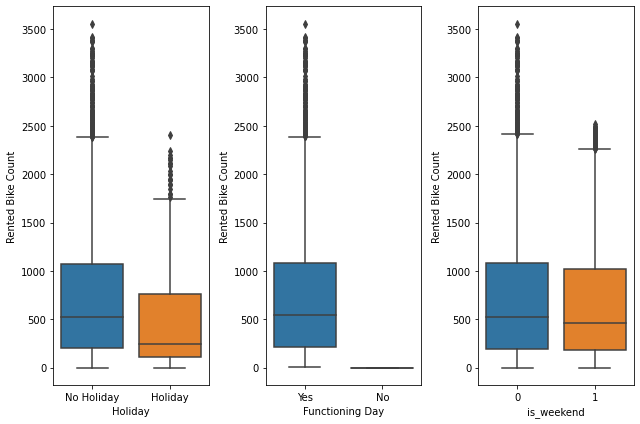

In [24]:
# effect of holiday, fucntioning day and is_weekend on Rented Bike Count
# all these columsn have only two category
fig, ax = plt.subplots(1,3, figsize=(9,6))
sns.boxplot(df['Holiday'], df['Rented Bike Count'], ax=ax[0])
sns.boxplot(df['Functioning Day'], df['Rented Bike Count'], ax=ax[1])
sns.boxplot(df['is_weekend'], df['Rented Bike Count'], ax=ax[2])
plt.tight_layout()

#### <b> Observation:

* Bikes are in higher demand for a No-Holiday and a Functioning Day.
* Average 500 bikes are in demand per day for a No Holiday and a Functioning day. 
* Day being a weekday or weenend hardly has any effect on the count of bike being rented.

## <b> Data Visualization

### <b> Hourly effect on renting bike count on different categorical features

Text(0.5, 1.0, 'Number of Bikes rented in different hours of the day')

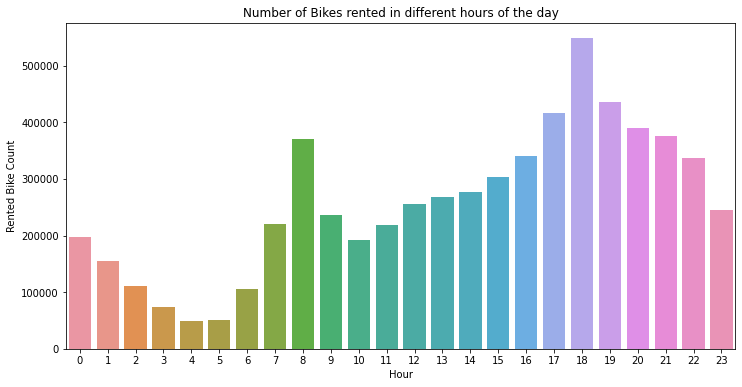

In [25]:
# firstly we will see the requirement of bike in different hours across the day

hourly_count = df.groupby('Hour')['Rented Bike Count'].sum().reset_index()
plt.figure(figsize = (12,6))
sns.barplot(x = hourly_count['Hour'], y= hourly_count['Rented Bike Count'])
plt.title('Number of Bikes rented in different hours of the day')

#### <b> Observation:
* We can see a peak of demand in the morning at 8 which happens to be the office time.
* Also an increased demand can be seen at 5 to 7 pm which is the office closing time. 
* Usually evening and nights bring in more demand than early morning time.
* Least demand can be seen at early morning 3-6 am.

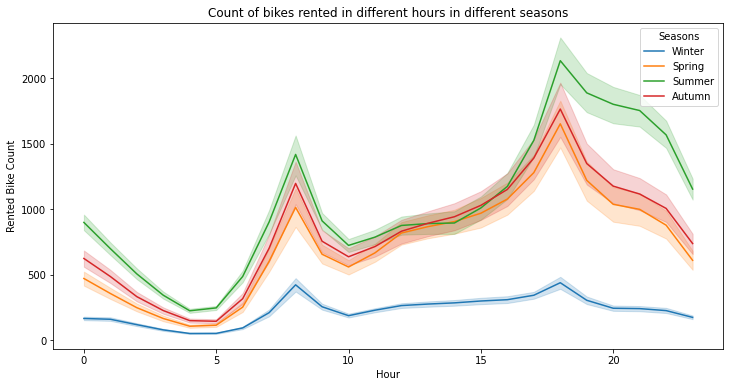

In [26]:
# count of bikes rented at differnt hours observed in different seasons.
plt.figure(figsize=(12,6))
sns.lineplot(x=df['Hour'], y= df['Rented Bike Count'], hue = df['Seasons'])
plt.title('Count of bikes rented in different hours in different seasons');

#### <b> Observation:
* For every season there is an increase in bike demand at around 8 am in the morning and in evening at around 5 pm which was also evident from the plot of Hour and Rented Bike count. 

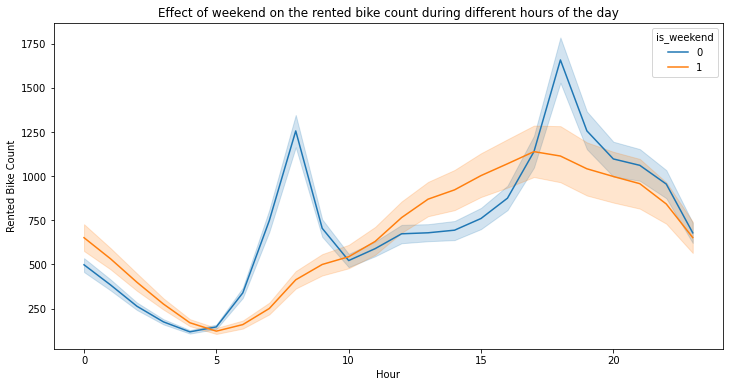

In [27]:
# effect of different hours on count of bike rented based on weekend or weekday.

plt.figure(figsize=(12,6))
sns.lineplot(x= df['Hour'], y=df['Rented Bike Count'], hue = df['is_weekend'])
plt.title('Effect of weekend on the rented bike count during different hours of the day')
plt.show();

#### <b>  Observations:
* We see an increase in the demand at the office timings i.e. 8 in the morning and 5 in the evening for weekdays.
* On weekends, from 3 pm to 9 pm bikes has been in a higher demand.

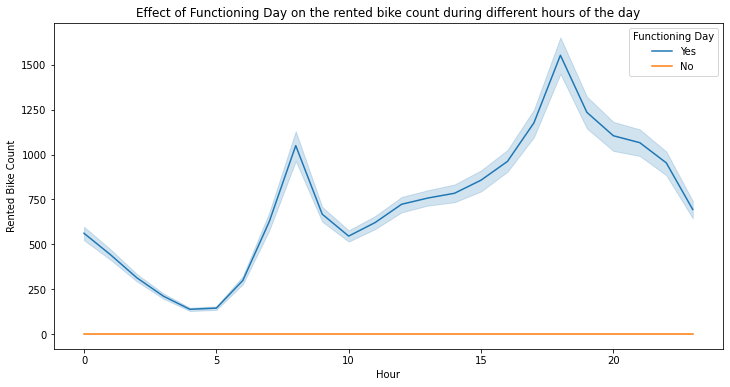

In [28]:
# effect of different hours on count of bike rented based on Functioning day.

plt.figure(figsize=(12,6))
sns.lineplot(x= df['Hour'], y=df['Rented Bike Count'], hue = df['Functioning Day'])
plt.title('Effect of Functioning Day on the rented bike count during different hours of the day')
plt.show();

#### <b> Observations:
* There is absolutely no demand of bikes on a Non functioning day as evident from a straight line parallel to x-axis.
* On a Functioning Day, again we see some higher demands during office timings.


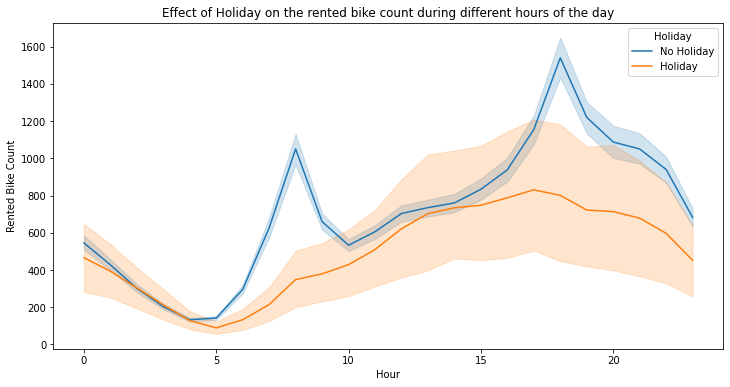

In [29]:
# effect of different hours on count of bike rented based on Holiday.

plt.figure(figsize=(12,6))
sns.lineplot(x= df['Hour'], y=df['Rented Bike Count'], hue = df['Holiday'])
plt.title('Effect of Holiday on the rented bike count during different hours of the day')
plt.show();

#### <b>  Observations: 
* Effect of holiday is similar to the effect of weekend on the hourly bike demand. 

In [30]:
# Dropiing features year and Day

df.drop(['Day', 'year'], axis=1, inplace=True)

We have dropped Day feature as we have a feature is_weekend created using feature Day which has lesser categories and provided some insight about the difference in demand on weekend and weekdays.

We have dropped year column as it has only two values 2017 and 2018 which holds no importance as observations for 2017 are too less than that for 2018.

## <b> Visualizing numerical Features

In [31]:
num_col = [col for col in df.columns if col not in cat_col and col != 'Rented Bike Count']
print(num_col)

['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


### <b> Univariate Analysis of Numerical Features

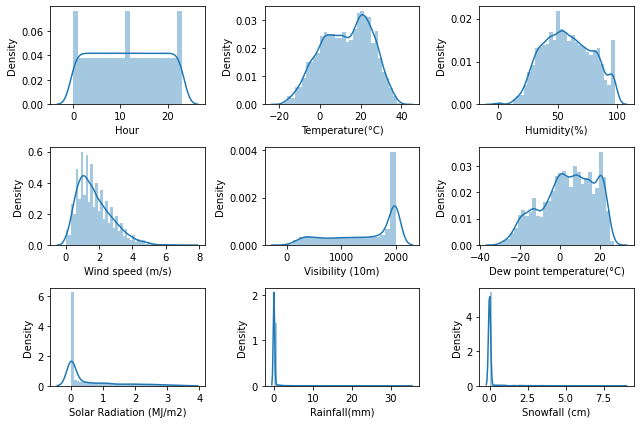

In [32]:
# distribution of the numerical features

plt.figure(figsize=(9, 6))
for i, col in enumerate(num_col):
    ax = plt.subplot(3, 3, i+1)
    sns.distplot(x=df[col], ax=ax)
    plt.xlabel(col)
plt.tight_layout()

####<b> Observations:
Windspeed, Rainfall, Solar Radiation, Snowfall,  features are positively skewed. 

Visibility is negatively skewed.

### <b>Rented Bike Count v/s Numerical Features

0.5385581530139789


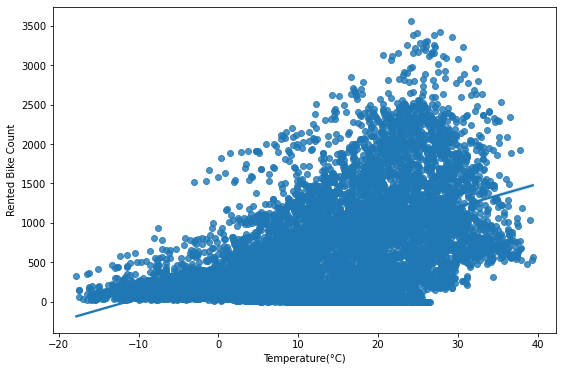

In [33]:
# Effect of Temperature on Rented Bike Count
print(df['Rented Bike Count'].corr(df['Temperature(°C)']))
plt.figure(figsize=(9,6))
sns.regplot(x=df['Temperature(°C)'], y=df['Rented Bike Count'])

#### <b> Observations:
People tend to opt for a rental bike when temperatures are between 10-30.

In cold temperatures a less demand for rental bikes can be seen. 

-0.19978016700089823


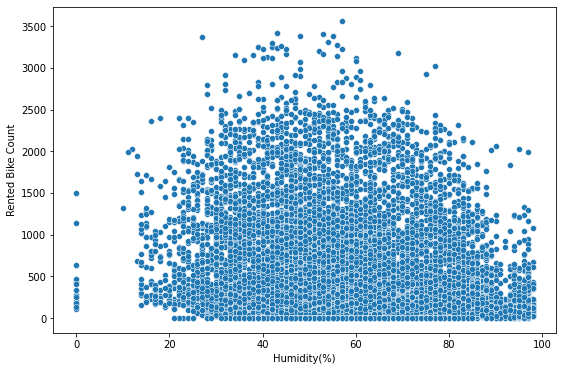

In [34]:
# Effect of Humidity on the Rental bikes
print(df['Rented Bike Count'].corr(df['Humidity(%)']))
plt.figure(figsize=(9,6))
sns.scatterplot(x=df['Humidity(%)'], y=df['Rented Bike Count'])

#### <b> Observation:
Humidity doesnot seem to impact the Rental Bike counts much.

Also the correlation between the two is very low.

0.19928029673135897


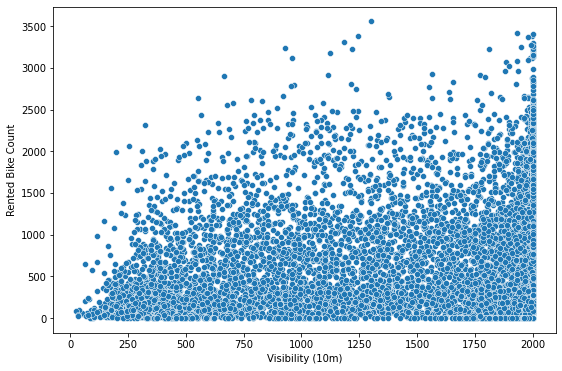

In [35]:
# Effect of visibility on the Count of Bike rented
print(df['Rented Bike Count'].corr(df['Visibility (10m)']))
plt.figure(figsize=(9,6))
sns.scatterplot(x=df['Visibility (10m)'], y=df['Rented Bike Count'])

#### <b> Observation:
Only a slight positive relation can be observed between the visibility and the counts of bike rented.

The effect of Visibility cannot be much interpreted on the Rented Bike Count.

-0.1418036499974599


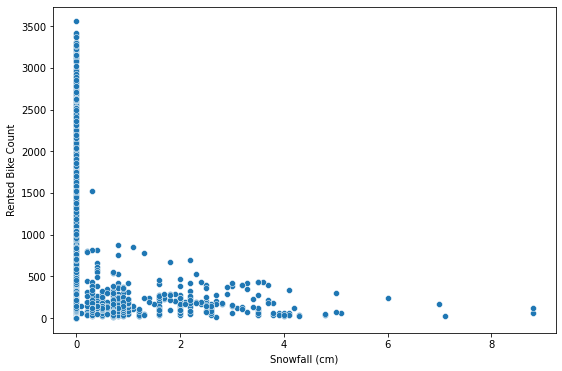

In [36]:
# Effect of snowfall on the Count of Bike rented
print(df['Rented Bike Count'].corr(df['Snowfall (cm)']))
plt.figure(figsize=(9,6))
sns.scatterplot(x=df['Snowfall (cm)'], y=df['Rented Bike Count'])

#### <b>Observations:
* Snowfall of 6 cm and above causes a decline in the Rentad Bike demand.
* Lesser the snowfall more be the demand.

-0.12307395980285019


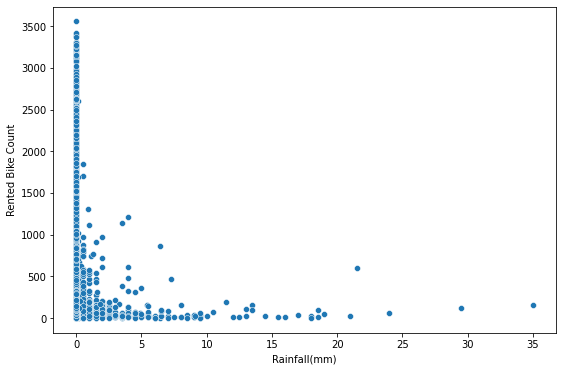

In [37]:
# Effect of Rainfall on the Count of Bike rented
print(df['Rented Bike Count'].corr(df['Rainfall(mm)']))
plt.figure(figsize=(9,6))
sns.scatterplot(x=df['Rainfall(mm)'], y=df['Rented Bike Count'])

####<b> Observations:
* There is a decrease in demand for rental bikes when rainfall is much higher.
* A great demand is there with no rainfall.

0.12110844818838667


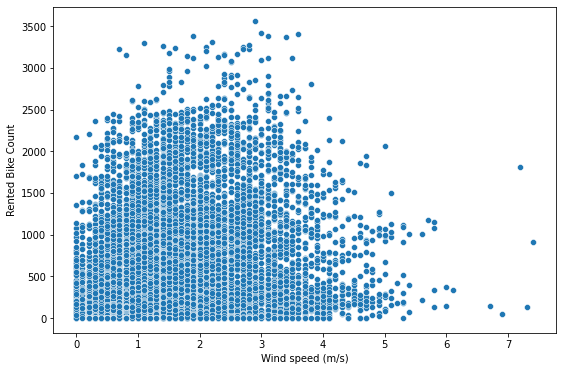

In [38]:
# Effect of windspeed on the Count of Bike rented
print(df['Rented Bike Count'].corr(df['Wind speed (m/s)']))
plt.figure(figsize=(9,6))
sns.scatterplot(x=df['Wind speed (m/s)'], y=df['Rented Bike Count'])

#### <b>Observations:

Rented bikes are in demand till the windspeed upto 4 m/s.

Bikes are not preferred when there is a high wind speed.

### <b>Regression Plot

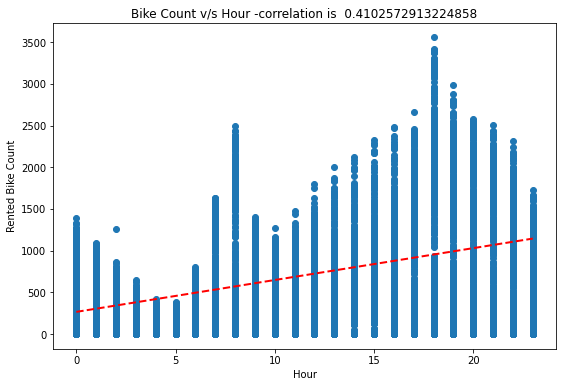

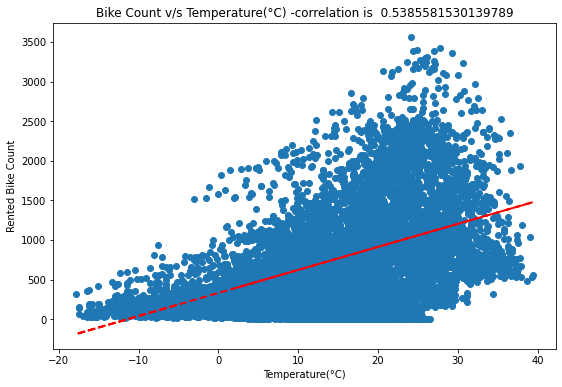

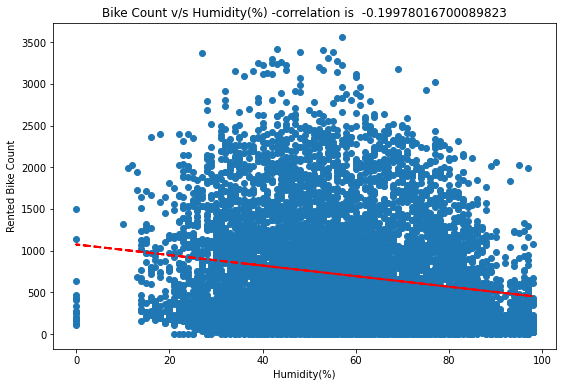

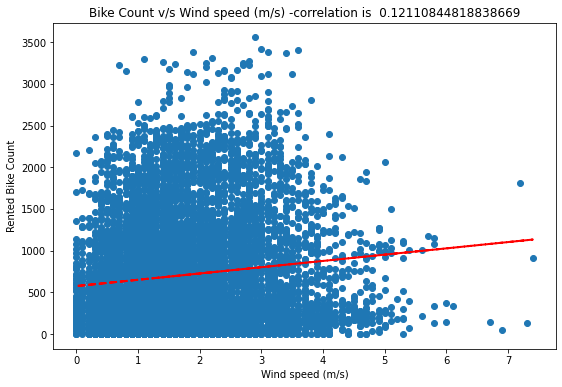

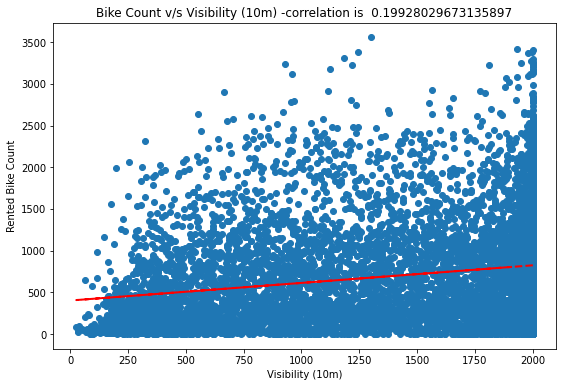

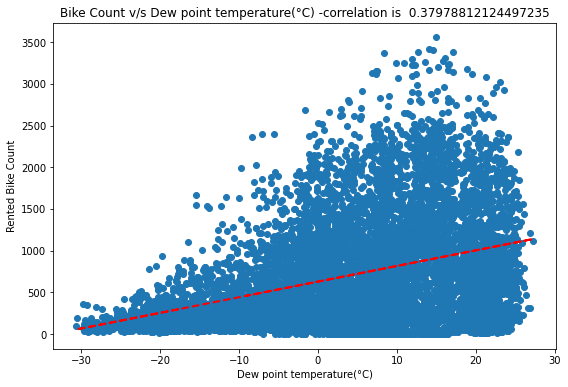

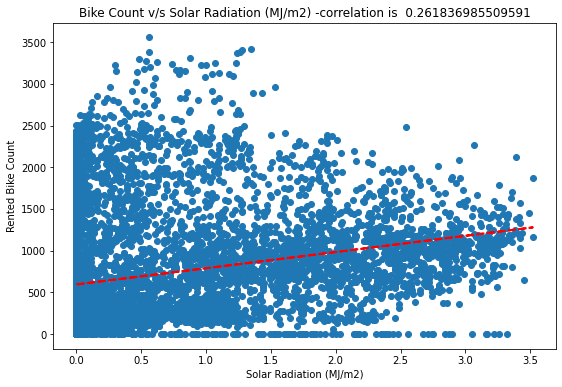

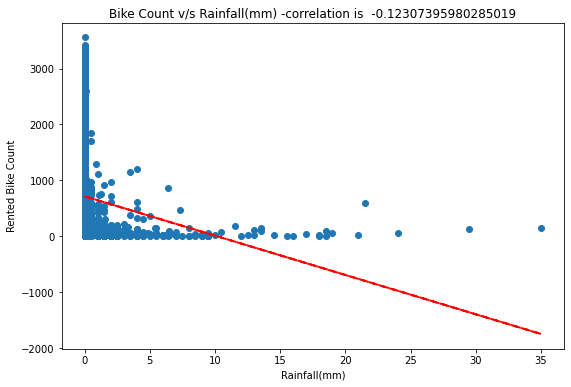

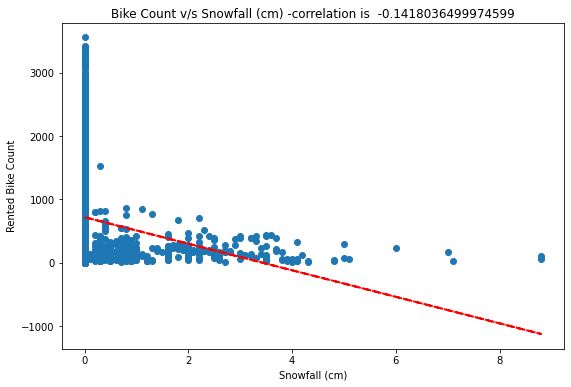

In [ ]:
# Regression plot will help us analyse if any variable holds linear relationship with the Dependent variable.
for col in num_col:
  fig = plt.figure(figsize=(9,6))
  ax = plt.gca()
  label = df['Rented Bike Count']
  corr=df[col].corr(label)
  plt.scatter(x=df[col], y=label)
  plt.xlabel(col)
  plt.ylabel('Rented Bike Count')
  ax.set_title(f'Bike Count v/s {col} -correlation is  {corr}')
  z = np.polyfit(df[col], label,1)
  y_pred = np.poly1d(z)(df[col])
  plt.plot(df[col], y_pred, 'r--', lw=2)
plt.show()

#### <b> Observations:
Temperature, Windspeed and Hour holds a positive relation with Rented Bike Count.

Rainfall and snowfall holds negative relationship with the Rented biek Count i.e. Rented Bike Count decreases as the snowfall/ rainfall increases.

## <b> Outliers

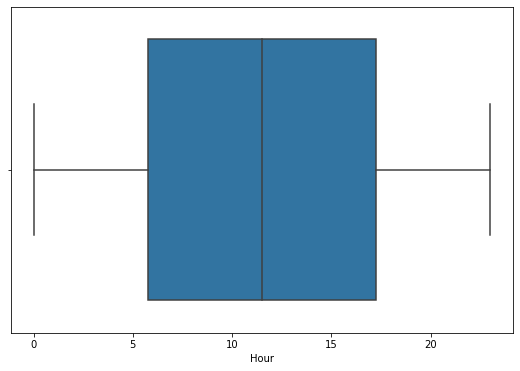

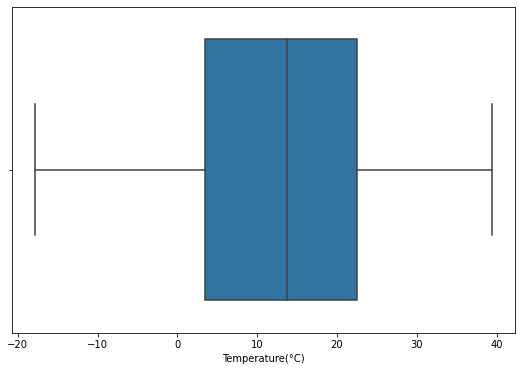

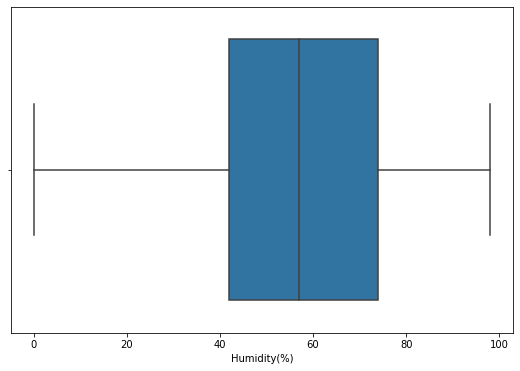

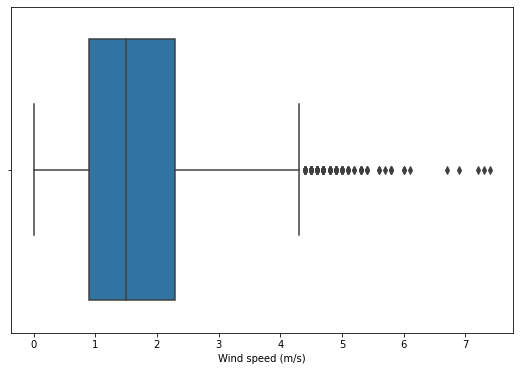

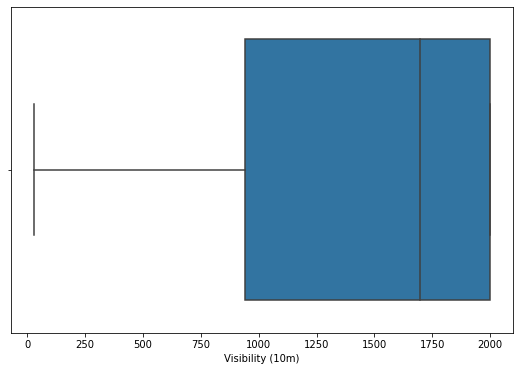

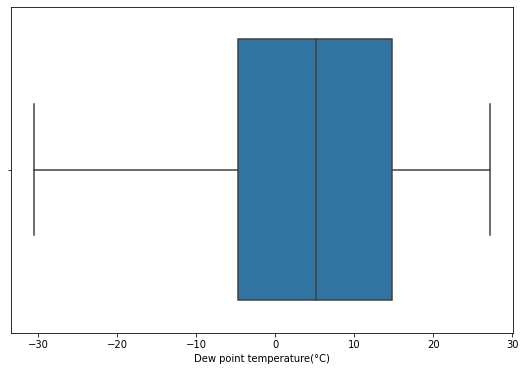

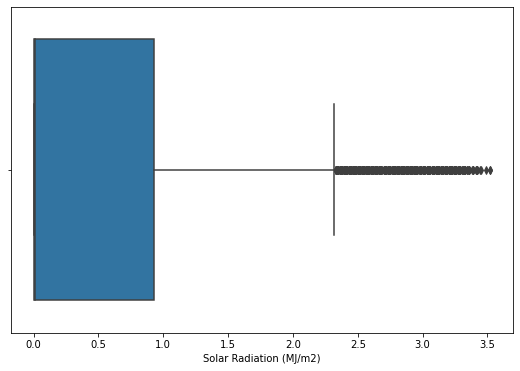

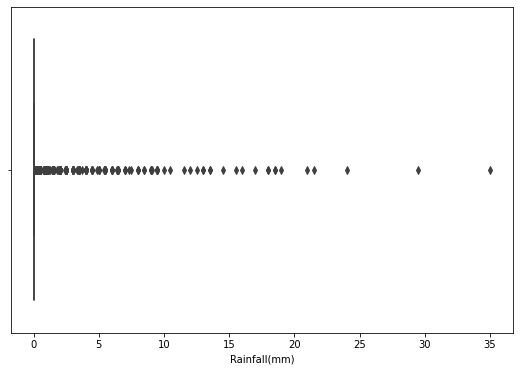

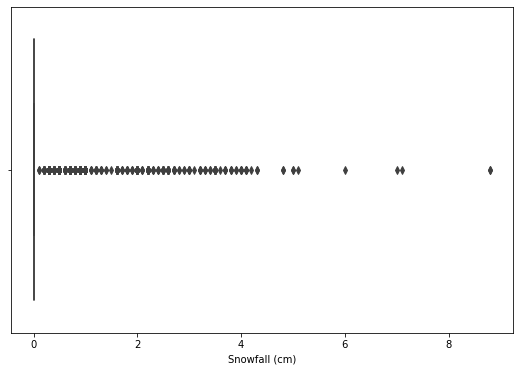

In [39]:
# check outliers in the numerical features
for i in num_col:
  plt.figure(figsize=(9,6))
  sns.boxplot(df[i])

Features - Windspeed, Solar Radiation, Rainfall and Snowfall seem to have outliers. Lets look at the max values of these features to see if the maximum values are out the value ranges for the feature.

In [43]:
outliers_feature = ['Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
for i in outliers_feature:
  print(f' the maximum values of {i} is: {df[i].max()}')

 the maximum values of Wind speed (m/s) is: 7.4
 the maximum values of Solar Radiation (MJ/m2) is: 3.52
 the maximum values of Rainfall(mm) is: 35.0
 the maximum values of Snowfall (cm) is: 8.8


* Wind speed of 7.4 m/s is an acceptable value so it can be considered well with the range of the feature.
* Average daily value of solar radiation at surface can go upto 35 MJ/m2 so the maximum value of solar radiation falls in the acceptable range and doesnot seem to be a noise.
* Rainfall for any region can be 35 mm so the maximum value of Rainfall is acceptable and is not an outlier.
* Similary snowfall can possibly be of 8.8 cm.
* So, we can proceed with our data without any removal of outliers.

## <b>Variance Inflation Factor

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(x):
  vif_df = pd.DataFrame()
  vif_df['Features']=x.columns
  vif_df['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
  return vif_df

In [45]:
vif(df[num_col])

,Features,VIF
0,Hour,4.418242
1,Temperature(°C),33.385256
2,Humidity(%),5.371996
3,Wind speed (m/s),4.805364
4,Visibility (10m),9.085977
5,Dew point temperature(°C),17.126199
6,Solar Radiation (MJ/m2),2.881590
7,Rainfall(mm),1.081567
8,Snowfall (cm),1.120833


In [46]:
# Temperature has a greater vif score so dropping that and checking again
vif(df[[col for col in num_col if col!='Temperature(°C)']])

,Features,VIF
0,Hour,3.847933
1,Humidity(%),5.262460
2,Wind speed (m/s),4.729187
3,Visibility (10m),4.964387
4,Dew point temperature(°C),1.656085
5,Solar Radiation (MJ/m2),1.914776
6,Rainfall(mm),1.079939
7,Snowfall (cm),1.111339


In [47]:
# Dropping Temperature from the bike dataset

df.drop('Temperature(°C)', axis=1, inplace=True)

In [48]:
df.head()

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,is_weekend
0,254,0,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,0
1,204,1,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,0
2,173,2,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,December,0
3,107,3,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,0
4,78,4,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,0


## <b> Correlation

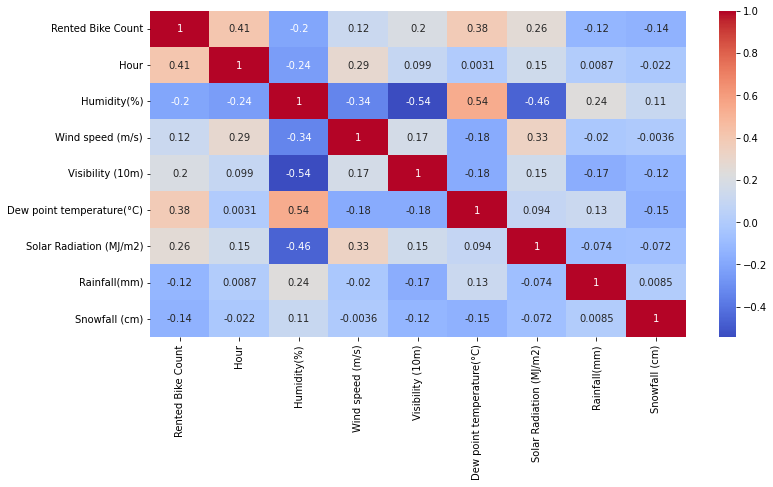

In [49]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)

#### <b> Observation:
We see that Hour and Dew Point Temperature has good correlation with the dependent variable Rented Bike Count.

Humidity, Snowfall and Rainfall are negativelt correlated with Rented bike Count.

As we have already checked the multicollinearity so independent variables are not much correlated with each other.

## <b>Dummy Variables

In [50]:
df = pd.get_dummies(df, drop_first=True)

In [51]:
df.shape

(8760, 26)

##<b> Model Training

In [52]:
# splitting the data
X=df.drop('Rented Bike Count', axis=1)
y=np.sqrt(df['Rented Bike Count'])   # to remove the skewness

In [53]:
# Scaling the train data

scale = MinMaxScaler()
X_scaled = scale.fit_transform(X)
X=pd.DataFrame(X_scaled, columns = X.columns)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)
print(x_train.shape)
print(x_test.shape)

(7008, 25)
(1752, 25)


In [56]:
# LINEAR REGRESSION

lr = LinearRegression()
lr.fit(x_train,y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

# Training set
mse_lr= mean_squared_error((y_train), (y_train_pred))
rmse_lr=np.sqrt(mse_lr)
mae_lr= mean_absolute_error(y_train, y_train_pred)
r2_lr= r2_score(y_train, y_train_pred)
adj_r2_lr = (1-(1-r2_score(y_train, y_train_pred))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)))


# Testing Set
mse_test= mean_squared_error((y_test), (y_test_pred))
rmse_test=np.sqrt(mse_lr)
mae_test= mean_absolute_error(y_test, y_test_pred)
r2_test= r2_score(y_test, y_test_pred)
adj_r2_test = (1-(1-r2_score(y_test, y_test_pred))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

print('Linear Regression')
print('=================\n\n')

print('For training dataset:\n')
print('R2 is:', r2_lr)
print('Adjusted R2 is:',adj_r2_lr)
print("MSE is:",mse_lr)
print("RMSE is:",rmse_lr)
print("MAE :",mae_lr)
print('\n\n')
print('For testing dataset:\n')
print('R2 is:', r2_test)
print('Adjusted R2 is:',adj_r2_test)
print("MSE is:",mse_test)
print("RMSE is:",rmse_test)
print("MAE :",mae_test)

Linear Regression


For training dataset:

R2 is: 0.6837123333650803
Adjusted R2 is: 0.6825798223845772
MSE is: 48.81366324862361
RMSE is: 6.986677554361845
MAE : 5.336505193584482



For testing dataset:

R2 is: 0.6833877116872185
Adjusted R2 is: 0.6788017863060947
MSE is: 49.86208426276339
RMSE is: 6.986677554361845
MAE : 5.370696829047093


* The R2 score of training and teasting data doesnot differ mcuh we can say that our model is not overfitting.
* R2 score of 0.68 tells us that 68% of the variance in the data is understood and captured by the model.
* Lets run different algorithms to see improvemebt if any.

In [60]:
lr=LinearRegression()
ridge=Ridge()
lasso=Lasso()
en = ElasticNet(alpha=0.1, l1_ratio =0.5)
dt = DecisionTreeRegressor()
rf= RandomForestRegressor()
gb = GradientBoostingRegressor()

models = [lr, ridge, lasso, en, dt,rf, gb]
train_r2=[]
train_adj_r2=[]
train_mse=[]
train_rmse=[]
train_mae=[]
test_r2=[]
test_adj_r2=[]
test_mse=[]
test_rmse=[]
test_mae=[]
Model=['Linear Regression', 'Ridge', 'Lasso', 'Elastic Net', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
for model in models:
  
  model.fit(x_train,y_train)
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  # Training set
  mse= np.round(mean_squared_error((y_train), (y_train_pred)),2)
  rmse=round(np.sqrt(mse_lr),2)
  mae= round(mean_absolute_error(y_train, y_train_pred),2)
  r2= round(r2_score(y_train, y_train_pred),2)
  adj_r2= round(1-(1-r2_score(y_train, y_train_pred))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)),2)
  train_r2.append(r2)
  train_adj_r2.append(adj_r2)
  train_mse.append(mse)
  train_rmse.append(rmse)
  train_mae.append(mae)


  # Testing Set
  mse_test= round(mean_squared_error((y_test), (y_test_pred)),2)
  rmse_test=round(np.sqrt(mse_lr),2)
  mae_test= round(mean_absolute_error(y_test, y_test_pred),2)
  r2_test= round(r2_score(y_test, y_test_pred),2)
  adj_r2_test = round((1-(1-r2_score(y_test, y_test_pred))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))),2)
  test_r2.append(r2_test)
  test_adj_r2.append(adj_r2_test)
  test_mse.append(mse_test)
  test_rmse.append(rmse_test)
  test_mae.append(mae_test)

In [61]:
evaluation = pd.DataFrame({'Model': Model,
                          'Training R2':train_r2,
                          'Testing R2':test_r2,
                          'Training Adjusted R2': train_adj_r2,
                          'Testing Adjusted R2': test_adj_r2,
                          'Training Mean Squared Error': train_mse,
                          'Testing Mean Squared Error': test_mse,
                          'Training Root Mean Squared Error':train_rmse,
                          'Testing Root Mean Squared Error':test_rmse,
                          'Training Mean Absolute Error': train_mae,
                          'Testing Mean Absolute Error': test_mae})

In [62]:
evaluation.T

,0,1,2,3,4,5,6
Model,Linear Regression,Ridge,Lasso,Elastic Net,Decision Tree,Random Forest,Gradient Boosting
Training R2,0.68,0.68,0.25,0.52,1.0,0.99,0.88
Testing R2,0.68,0.68,0.23,0.5,0.88,0.93,0.87
Training Adjusted R2,0.68,0.68,0.25,0.52,1.0,0.99,0.88
Testing Adjusted R2,0.68,0.68,0.22,0.49,0.88,0.93,0.87
Training Mean Squared Error,48.81,48.86,115.52,74.27,0.0,1.4,18.18
Testing Mean Squared Error,49.86,50.04,121.41,79.33,19.21,10.53,20.48
Training Root Mean Squared Error,6.99,6.99,6.99,6.99,6.99,6.99,6.99
Testing Root Mean Squared Error,6.99,6.99,6.99,6.99,6.99,6.99,6.99
Training Mean Absolute Error,5.34,5.35,8.5,6.72,0.0,0.75,3.13
